In [1]:
!pip install "qiskit==1.3.2"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import qiskit

In [3]:
qiskit.__version__

'1.3.2'

In [4]:
pip show qiskit


Name: qiskit
Version: 1.3.2
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /users/PLS0167/rjahan01/.local/lib/python3.9/site-packages
Requires: rustworkx, symengine, stevedore, sympy, typing-extensions, scipy, dill, numpy, python-dateutil
Required-by: qiskit-ibm-runtime, qiskit-ibm-provider, qiskit-algorithms, qiskit-aer
Note: you may need to restart the kernel to use updated packages.


In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:

!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install qiskit-ibm-runtime

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install 'qiskit[visualization]'

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install qiskit_aer

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session

# Create a simple quantum circuit
qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0, 1)
qc.measure_all()

# Use Qiskit Aer simulator
backend = AerSimulator()
estimator = Estimator()

# Print confirmation
print("Qiskit 1.3.1 setup is working correctly!")

Qiskit 1.3.1 setup is working correctly!


/tmp/slurmtmp.36037895/ipykernel_271538/1321213518.py:19: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [12]:
!pip install qiskit-ibm-provider

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install qiskit-algorithms

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install --upgrade qiskit-algorithms

Defaulting to user installation because normal site-packages is not writeable


QRAM data: {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1}
Address (bin): 000 -> Data: 0 | Count: 128 | Address (dec): 0
Address (bin): 010 -> Data: 0 | Count: 135 | Address (dec): 2
Address (bin): 100 -> Data: 0 | Count: 125 | Address (dec): 4
Address (bin): 110 -> Data: 0 | Count: 131 | Address (dec): 6
Address (bin): 001 -> Data: 1 | Count: 129 | Address (dec): 1
Address (bin): 011 -> Data: 1 | Count: 116 | Address (dec): 3
Address (bin): 101 -> Data: 1 | Count: 126 | Address (dec): 5
Address (bin): 111 -> Data: 1 | Count: 134 | Address (dec): 7


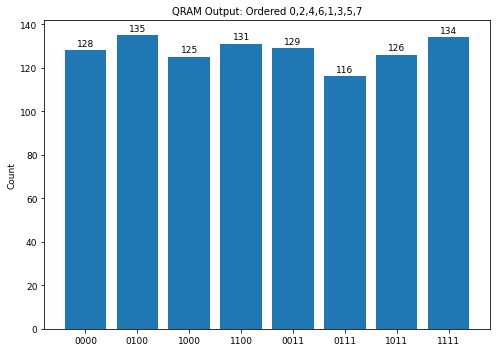

In [15]:
# QRAM sampler for all the indices, all possible states

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt


# 1. Define QRAM data
def get_qram_data():
    return {i: i % 2 for i in range(8)}  # 3-bit addresses: 0–7

qram_data = get_qram_data()
print("QRAM data:", qram_data)

# 2. Setup
num_address_qubits = 3
address = QuantumRegister(num_address_qubits, name='addr')
data = QuantumRegister(1, name='data')
creg = ClassicalRegister(num_address_qubits + 1, name='c')  # addr + data
qc = QuantumCircuit(address, data, creg)

# 3. Put address qubits into superposition
qc.h(address)

# 4. Encode QRAM: Flip data qubit where value == 1
for addr_int, val in qram_data.items():
    if val == 1:
        addr_bin = format(addr_int, '03b')  # 3-bit binary string
        
        for i in range(num_address_qubits):
            if addr_bin[2 - i] == '0':
                qc.x(address[i])
                
        qc.mcx(address[:], data[0])  # Multi-controlled X gate
        
        # Uncompute
        for i in range(num_address_qubits):
            if addr_bin[2 - i] == '0':
                qc.x(address[i])

# 5. Measure
qc.measure(address, creg[:num_address_qubits])
qc.measure(data, creg[num_address_qubits])

# 6. Simulate
simulator = AerSimulator()
compiled = transpile(qc, simulator)
job = simulator.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()



corrected_counts = {}
for bitstring, count in sorted(counts.items(), key=lambda x: x[0]):
    addr = bitstring[:-1][::-1]  
    data_bit = bitstring[-1]
    full_string = addr + data_bit
    corrected_counts[full_string] = count


ordered_addresses = [0, 2, 4, 6, 1, 3, 5, 7]
reordered_counts = {}

for addr in ordered_addresses:
    addr_bin = format(addr, '03b')
    for bitstring in sorted(corrected_counts):
        if bitstring.startswith(addr_bin):
            count = corrected_counts[bitstring]
            data_bit = bitstring[-1]
            full_label = addr_bin + data_bit
            print(f"Address (bin): {addr_bin} -> Data: {data_bit} | Count: {count} | Address (dec): {addr}")
            reordered_counts[full_label] = count



plt.figure(figsize=(7, 5))  
bars = plt.bar(reordered_counts.keys(), reordered_counts.values(), color='#1f77b4')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f'{int(yval)}',
             ha='center', va='bottom', fontsize=9)

# Labels
plt.title("QRAM Output: Ordered 0,2,4,6,1,3,5,7", fontsize=10)
plt.ylabel("Count", fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()



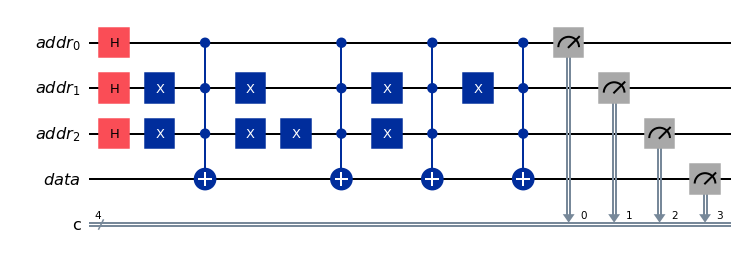

In [16]:
qc.draw('mpl')